<a href="https://colab.research.google.com/github/DataGalz/CIND820/blob/main/CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:

url = 'https://raw.githubusercontent.com/DataGalz/CIND820/main/CPI_MONTHLY.csv'
data = pd.read_csv(url)
df = pd.DataFrame(data)
print(df)
#converted the data into a dataframe




           date  Total CPI  Total CPI.1  ...  CPIX  CPI-XFET  CPIW
0    1995-01-01       86.6         86.6  ...   NaN       2.2   1.7
1    1995-02-01       87.0         87.0  ...   NaN       1.8   1.7
2    1995-03-01       87.2         87.2  ...   NaN       2.1   1.9
3    1995-04-01       87.5         87.4  ...   NaN       2.1   2.0
4    1995-05-01       87.7         87.7  ...   NaN       2.5   2.2
..          ...        ...          ...  ...   ...       ...   ...
315  2021-04-01      140.3        140.0  ...   2.3       1.8   2.6
316  2021-05-01      141.0        140.5  ...   2.8       2.4   3.0
317  2021-06-01      141.4        140.8  ...   2.7       2.2   3.0
318  2021-07-01      142.3        141.6  ...   3.3       2.8   3.3
319  2021-08-01      142.6        142.2  ...   3.5       3.0   3.4

[320 rows x 10 columns]


In [4]:
df.dtypes
#checking the type of data

date                 object
Total CPI           float64
Total CPI.1         float64
TOTAL_CPI_CHANGE    float64
CPI_TRIM            float64
CPI_MEDIAN          float64
CPI_COMMON          float64
CPIX                float64
CPI-XFET            float64
CPIW                float64
dtype: object

In [5]:
df.head(5)
# the first 5 rows of the data

,date,Total CPI,Total CPI.1,TOTAL_CPI_CHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,CPIX,CPI-XFET,CPIW
0,1995-01-01,86.6,86.6,0.6,1.8,1.8,1.1,NaN,2.2,1.7
1,1995-02-01,87.0,87.0,1.9,1.9,1.8,1.1,NaN,1.8,1.7
2,1995-03-01,87.2,87.2,2.1,2.0,1.8,1.3,NaN,2.1,1.9
3,1995-04-01,87.5,87.4,2.5,2.1,2.0,1.3,NaN,2.1,2.0
4,1995-05-01,87.7,87.7,2.9,2.3,2.1,1.4,NaN,2.5,2.2


In [6]:
df.tail(5)
#the last 5 rows of the data

,date,Total CPI,Total CPI.1,TOTAL_CPI_CHANGE,CPI_TRIM,CPI_MEDIAN,CPI_COMMON,CPIX,CPI-XFET,CPIW
315,2021-04-01,140.3,140.0,3.4,2.3,2.1,1.7,2.3,1.8,2.6
316,2021-05-01,141.0,140.5,3.6,2.7,2.3,1.8,2.8,2.4,3.0
317,2021-06-01,141.4,140.8,3.1,2.7,2.3,1.7,2.7,2.2,3.0
318,2021-07-01,142.3,141.6,3.7,3.1,2.5,1.7,3.3,2.8,3.3
319,2021-08-01,142.6,142.2,4.1,3.3,2.6,1.8,3.5,3.0,3.4


In [7]:
df.describe
#describe the data


<bound method NDFrame.describe of            date  Total CPI  Total CPI.1  ...  CPIX  CPI-XFET  CPIW
0    1995-01-01       86.6         86.6  ...   NaN       2.2   1.7
1    1995-02-01       87.0         87.0  ...   NaN       1.8   1.7
2    1995-03-01       87.2         87.2  ...   NaN       2.1   1.9
3    1995-04-01       87.5         87.4  ...   NaN       2.1   2.0
4    1995-05-01       87.7         87.7  ...   NaN       2.5   2.2
..          ...        ...          ...  ...   ...       ...   ...
315  2021-04-01      140.3        140.0  ...   2.3       1.8   2.6
316  2021-05-01      141.0        140.5  ...   2.8       2.4   3.0
317  2021-06-01      141.4        140.8  ...   2.7       2.2   3.0
318  2021-07-01      142.3        141.6  ...   3.3       2.8   3.3
319  2021-08-01      142.6        142.2  ...   3.5       3.0   3.4

[320 rows x 10 columns]>

In [8]:
min(df.date)
#checking the year and month where the CPI was lowest

'1995-01-01'

In [9]:
max(df.date)
#checking the year and month where the CPI was highest

'2021-08-01'

In [10]:
df.isnull().sum()
#checking for null values

date                 0
Total CPI            0
Total CPI.1          0
TOTAL_CPI_CHANGE     0
CPI_TRIM             0
CPI_MEDIAN           0
CPI_COMMON           0
CPIX                60
CPI-XFET             0
CPIW                 0
dtype: int64

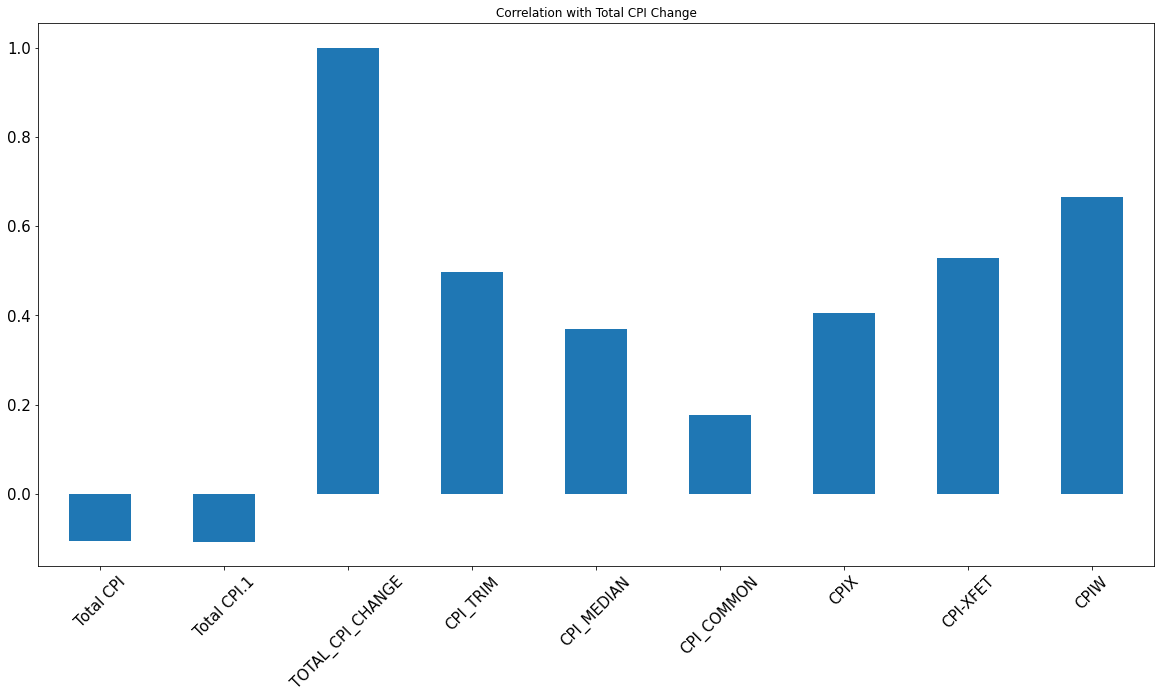

In [11]:
df.corrwith(df.TOTAL_CPI_CHANGE).plot.bar(
figsize = (20, 10), title = "Correlation with Total CPI Change", fontsize = 15, rot = 45, grid = False)

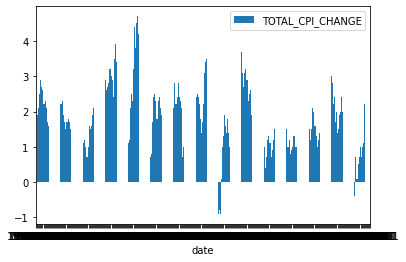

In [27]:
ax = df.plot.bar(x='date', y='TOTAL_CPI_CHANGE', rot=0)


In [ ]:
plt.figure(figsize=(10,5))
cor= df.corr()
sns.heatmap(cor,cmap="BrBG",annot=True)
cor

#checking correcation of data to identify attributes that are highly correlated with each other

In [ ]:
df = df.drop(['Total CPI','CPI_MEDIAN', 'Total CPI.1','CPI_COMMON','CPIX'], axis=1)
df.head(5)

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['date'], df['TOTAL_CPI_CHANGE'])
ax.set_xlabel('date')
ax.set_ylabel('TOTAL_CPI_CHANGE')
plt.show()

#scatter plot of CPI Change data

In [ ]:
date_CPI_Median_Min = df.groupby('date')['TOTAL_CPI_CHANGE'].min().plot(kind = 'line', legend = True, figsize = (20,7),marker = 'v')
date_CPI_Median_Max = df.groupby('date')['TOTAL_CPI_CHANGE'].max().plot(kind = 'line', legend = True, figsize = (20,7),marker = 'o')
date_CPI_Median_avg = df.groupby('date')['TOTAL_CPI_CHANGE'].std().plot(kind = 'line', legend = True, figsize = (20,7),marker = 'D')
plt.title('Min, Max and STD of CPI CHANGE by date')